In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import folium

In [18]:
from keplergl import KeplerGl

Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
Считать данные с помощью pandas

Вывести на экран первые 5 строк

1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib

1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib

1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [23]:
df = pd.read_csv('./laptops_10.csv', encoding='1251')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


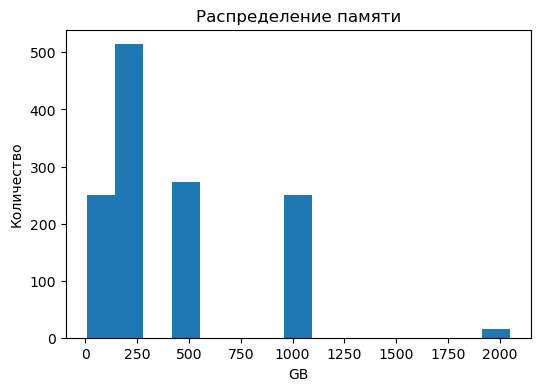

In [64]:
plt.figure(figsize=(6,4))
plt.hist(df['Memory_Amount'], bins=15)
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество');

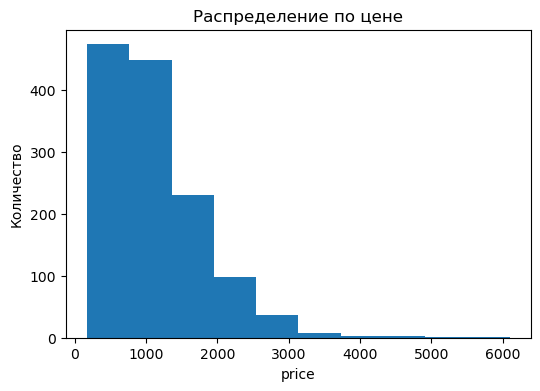

In [47]:
plt.figure(figsize=(6,4))
plt.hist(df['Price_euros'], bins=10)
plt.title('Распределение по цене')
plt.xlabel('price')
plt.ylabel('Количество');

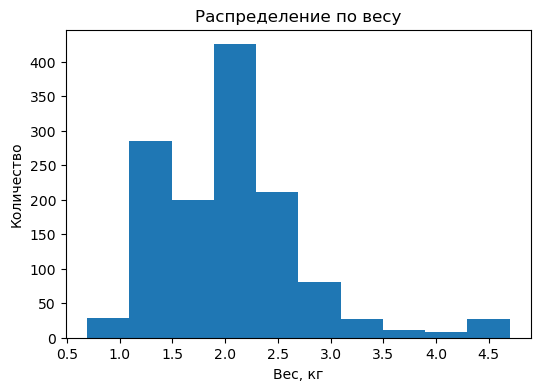

In [51]:
plt.figure(figsize=(6,4))
plt.hist(df['Weight'], bins=10)
plt.title('Распределение по весу')
plt.xlabel('Вес, кг')
plt.ylabel('Количество');

2.1 Изучите распределение типов носителя (Memory_Type)
2.2 Изучите распределение компаний производителей (Company)
2.3 Изучите распределение операционной системы (OpSys)
2.4 Изучите распределение компаний производителей CPU (Cpu_Company)

Постройте график
Сделайте выводы

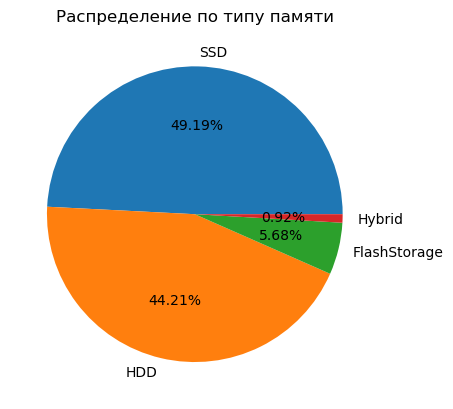

In [75]:
data = df['Memory_Type'].value_counts(normalize=True)
plt.pie(data, autopct = '%.2f%%', labels = data.index)
plt.title('Распределение по типу памяти');

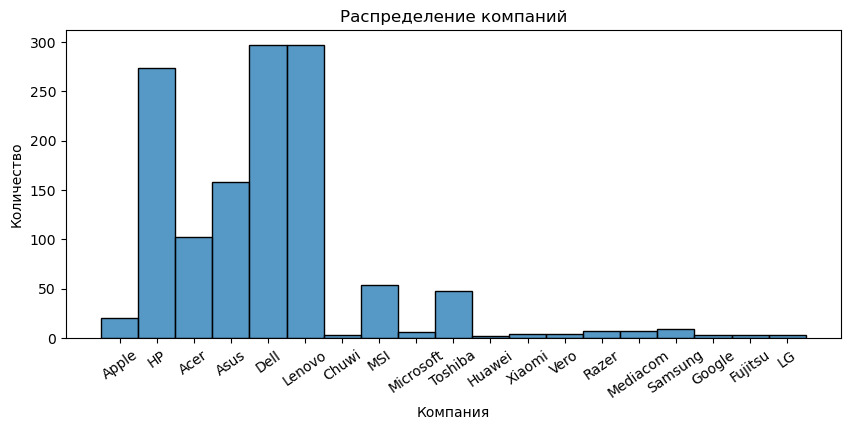

In [80]:
plt.figure(figsize=(10,4))
sns.histplot(df['Company'])
plt.title('Распределение компаний');
plt.xlabel('Компания')
plt.ylabel('Количество');
plt.xticks(rotation=35);

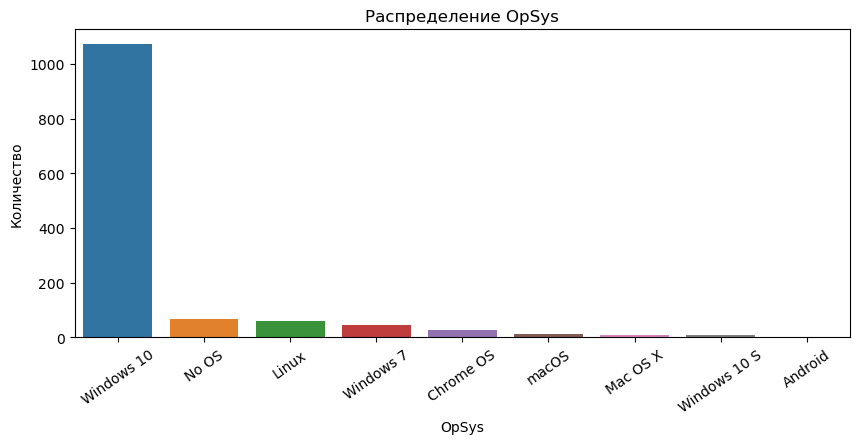

In [96]:
data = df['OpSys'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x = data.index, y = data.values)
plt.title('Распределение OpSys');
plt.xlabel('OpSys')
plt.ylabel('Количество');
plt.xticks(rotation=35);

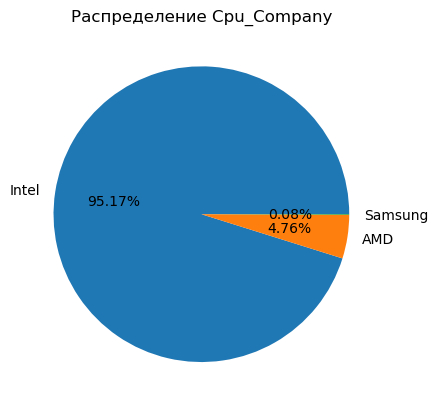

In [101]:
data_1 = df['Cpu_Company'].value_counts(normalize=True)
plt.pie(data_1, autopct = '%.2f%%', labels = data_1.index)
plt.title('Распределение Cpu_Company');

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах
3.2 Постройте график в относительных величинах

In [109]:
data_2 = df[['Cpu_Company', 'Company']].value_counts().unstack('Cpu_Company').fillna(0).drop(columns=['Samsung']).reset_index()
data_2

Cpu_Company,Company,AMD,Intel
0,Acer,10.0,93.0
1,Apple,0.0,21.0
2,Asus,11.0,147.0
3,Chuwi,0.0,3.0
4,Dell,0.0,297.0
5,Fujitsu,0.0,3.0
6,Google,0.0,3.0
7,HP,25.0,249.0
8,Huawei,0.0,2.0
9,LG,0.0,3.0


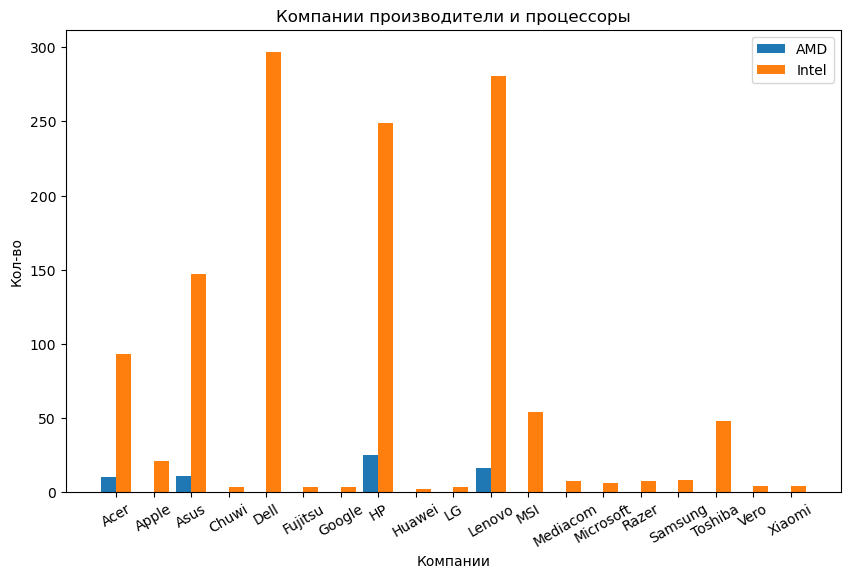

In [116]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(10, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data_2['AMD']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data_2['AMD'], width=w)
plt.bar(n_ticks + offset, data_2['Intel'], width=w)

plt.title('Компании производители и процессоры')
plt.xlabel('Компании')
plt.ylabel('Кол-во')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data_2['Company'], rotation = 30);  # добавляем метки делений

In [126]:
data_3 = df[['Cpu_Company', 'Company']].value_counts().unstack('Cpu_Company').fillna(0).drop(columns=['Samsung']).reset_index()
data_3

Cpu_Company,Company,AMD,Intel
0,Acer,10.0,93.0
1,Apple,0.0,21.0
2,Asus,11.0,147.0
3,Chuwi,0.0,3.0
4,Dell,0.0,297.0
5,Fujitsu,0.0,3.0
6,Google,0.0,3.0
7,HP,25.0,249.0
8,Huawei,0.0,2.0
9,LG,0.0,3.0


In [136]:
data_3 = pd.crosstab(index = df['Company'],
        columns=df['Cpu_Company'],
        normalize = 'index').drop(columns=['Samsung'], index = 'Samsung').reset_index()

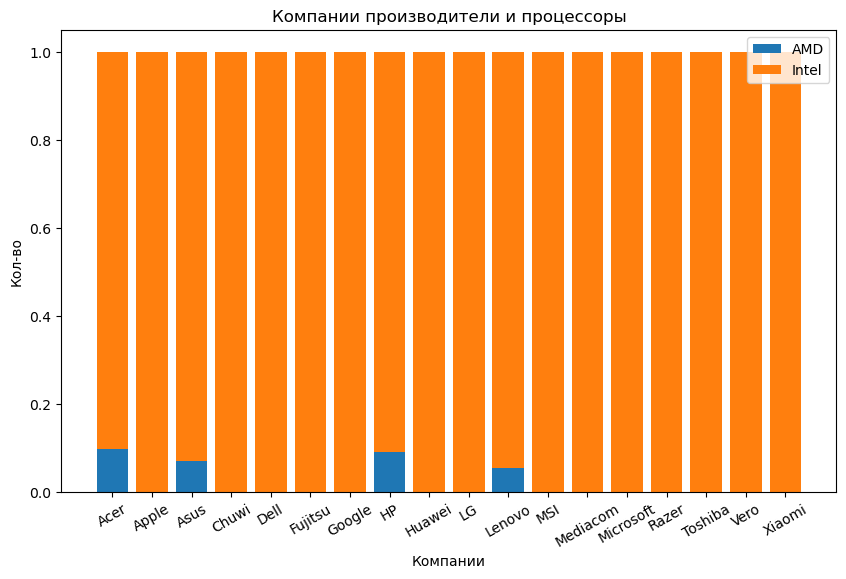

In [137]:
plt.figure(figsize=(10, 6))
n_ticks = np.arange(len(data_3['AMD']))
w = 0.8
plt.bar(n_ticks, data_3['AMD'], width=w)
plt.bar(n_ticks, data_3['Intel'], width=w, bottom=data_3['AMD'])
plt.title('Компании производители и процессоры')
plt.xlabel('Компании')
plt.ylabel('Кол-во')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data_3['Company'], rotation = 30);  # добавляем метки делений

4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти
4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

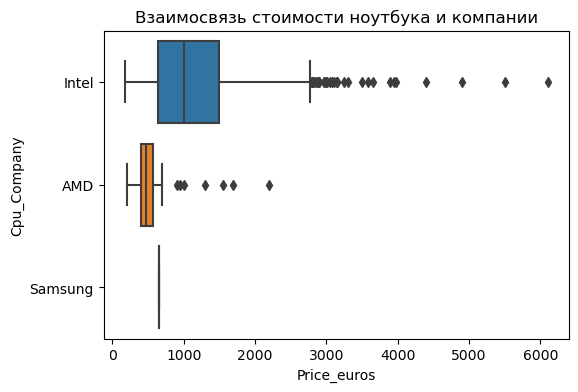

In [140]:
plt.figure(figsize=(6, 4))

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'])

plt.title('Взаимосвязь стоимости ноутбука и компании')
plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company');


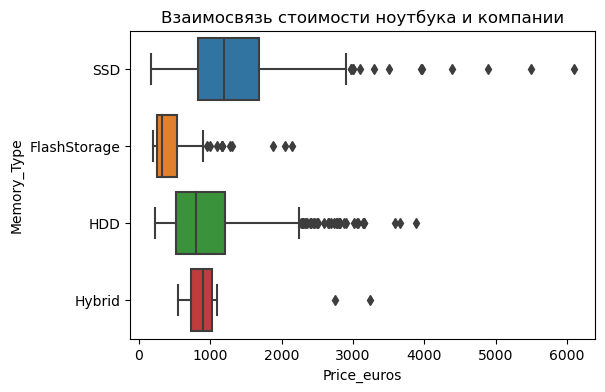

In [141]:
plt.figure(figsize=(6, 4))

sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'])

plt.title('Взаимосвязь стоимости ноутбука и Memory_Type')
plt.xlabel('Price_euros')
plt.ylabel('Memory_Type');

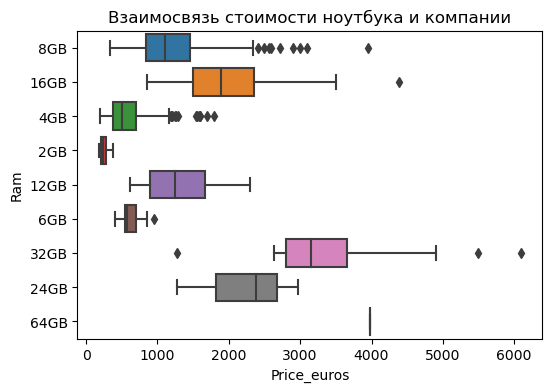

In [142]:
plt.figure(figsize=(6, 4))

sns.boxplot(x=df['Price_euros'], y=df['Ram'])

plt.title('Взаимосвязь стоимости ноутбука и RAM')
plt.xlabel('Price_euros')
plt.ylabel('Ram');

Постройте матрицу корреляций для таблицы

In [143]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix,1)
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.1,0.3
Weight,0.8,1.0,0.2,0.2
Price_euros,0.1,0.2,1.0,-0.1
Memory_Amount,0.3,0.2,-0.1,1.0


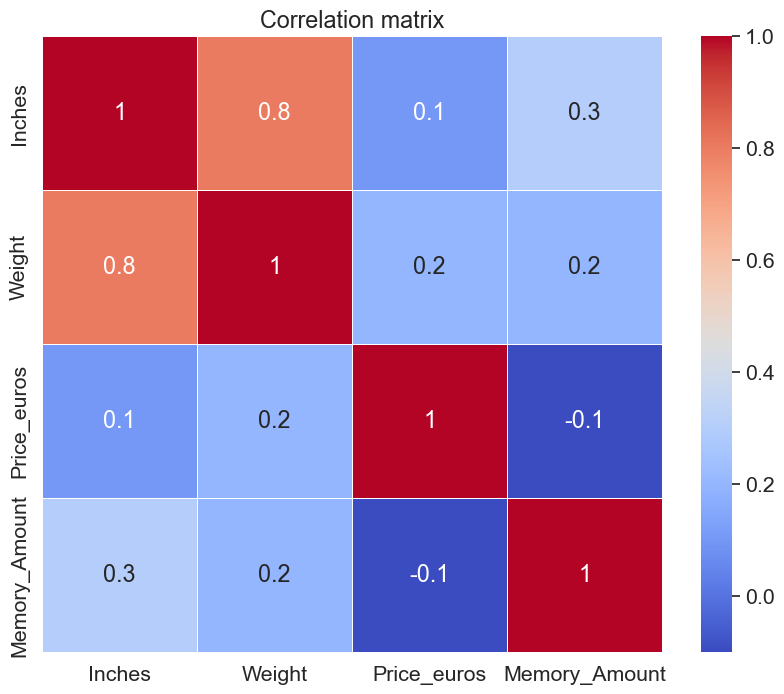

In [144]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');